In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib as plt
import matplotlib.pyplot as plt
#!pip install --upgrade matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

Task 1: Exploratory Data Analysis (EDA):

1.	Load the dataset and perform basic data exploration.

In [2]:
wine=pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.value_counts("Type")

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [7]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
wine.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


No missing values

In [13]:
wine.duplicated().sum()

0

2.	Examine the distribution of features using histograms, box plots, or density plots.

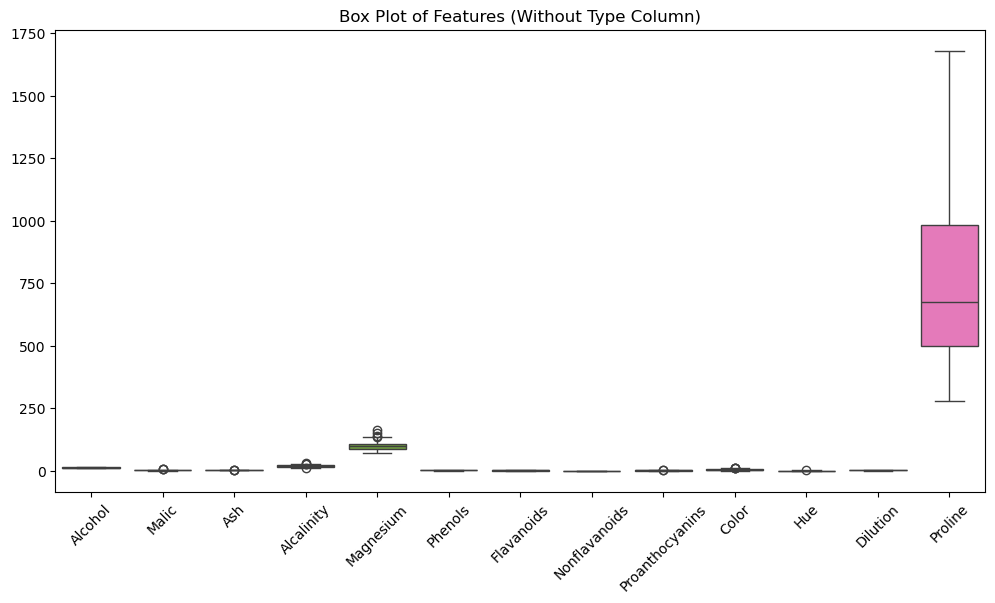

In [15]:
# Box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=wine.drop(columns=["Type"]))
plt.xticks(rotation=45)
plt.title("Box Plot of Features (Without Type Column)")
plt.show()

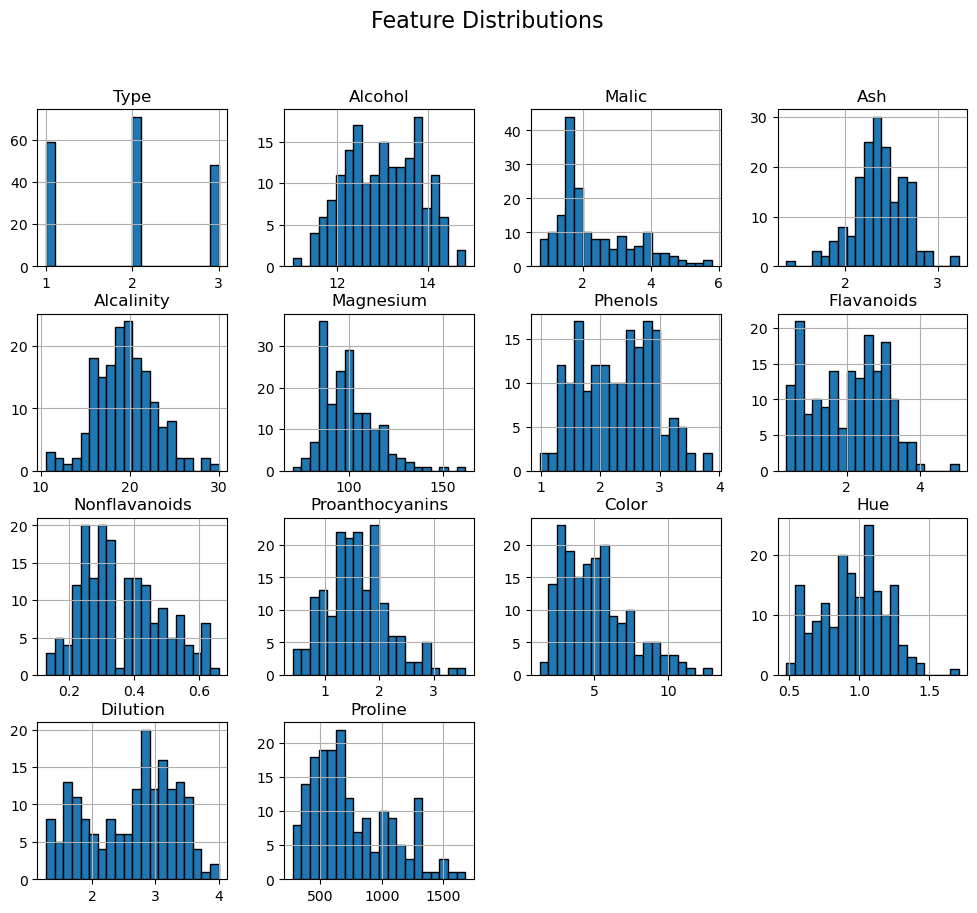

In [17]:
# Plot histograms for all features
fig = plt.figure(figsize=(12, 10))
wine.hist(ax=fig.gca(), bins=20, edgecolor="black")
fig.suptitle("Feature Distributions", fontsize=16)
plt.show()


Key Insights from EDA:
Feature Distribution:

Most features have a right-skewed distribution, particularly Proline, Color, and Alcalinity.
Some features have potential outliers, as seen in the box plots.
Feature Ranges:

Alcohol, Malic, and Phenols have relatively small ranges.
Proline has a significantly large range (278 to 1680), which could dominate PCA if not standardized.

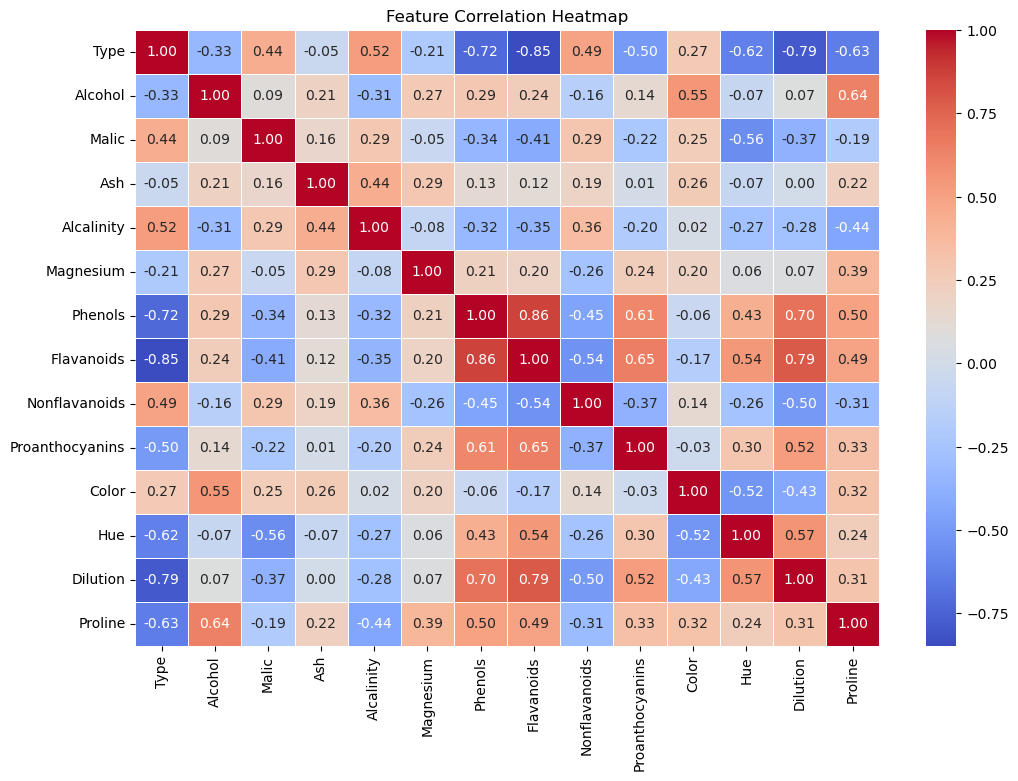

In [19]:
# Compute the correlation matrix
correlation_matrix = wine.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Correlation Analysis:



1.Strong Positive Correlations:

Flavanoids and Phenols (0.86)

Dilution and Hue (0.79)

Proline and Alcohol (0.64)




2.Negative Correlations:

Flavanoids and Nonflavanoids (-0.54)

Color and Hue (-0.56)

Task 2: Dimensionality Reduction with PCA:

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset

In [21]:
features = wine.drop(columns=["Type"])
std=StandardScaler()
scaled_data=std.fit_transform(features)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [23]:
pca=PCA()
pca_components=pca.fit_transform(scaled_data)

In [25]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [27]:
pca.explained_variance_ratio_


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [29]:
var=np.cumsum(pca.explained_variance_ratio_)
var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

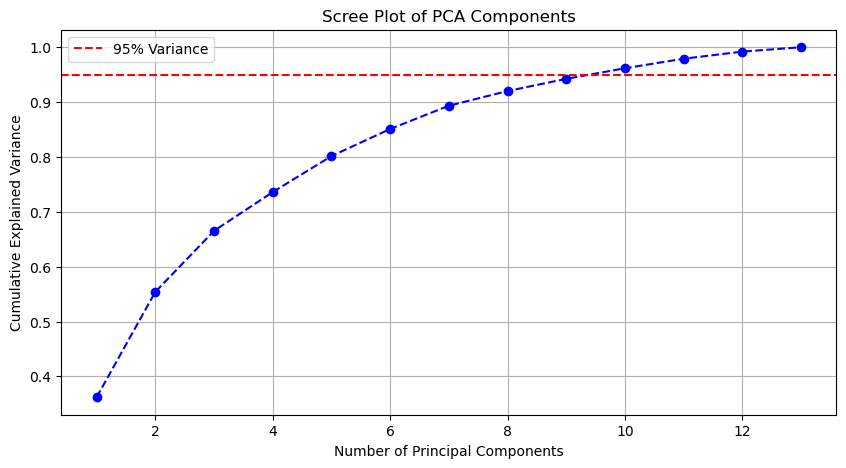

10

In [31]:
# Scree plot to determine optimal number of components
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(var) + 1), var, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot of PCA Components")
plt.legend()
plt.grid(True)
plt.show()

# Find number of components explaining at least 95% variance
optimal_components = np.argmax(var >= 0.95) + 1
optimal_components

PCA Results:

The scree plot shows that 10 principal components capture at least 95% of the variance in the dataset.


This means we can reduce dimensionality from 13 features to 10 while retaining most of the information.

2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

In [33]:
# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=10)
pca_transformed = pca_optimal.fit_transform(scaled_data)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=[f"PC{i+1}" for i in range(10)])
pca_df["Type"] = wine["Type"]  # Retain the target variable for analysis


In [35]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,1


In [90]:
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
print("wcss=",wcss)

wcss= [1658.7588524290954, 1277.928488844642, 1175.428333103347, 1109.5127392938243, 1046.0023332143637, 981.5952326111659, 935.2012114738546, 889.8929111933174, 845.8952366525514]


In [94]:
silhouette_scores = []
for i in range(2, 11):  
     

    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    

    # Compute silhouette score
    try:
        score = silhouette_score(scaled_data, kmeans.labels_)
        silhouette_scores.append(score)
    except Exception as e:
        print("Silhouette score error:", e)
        

print("Final silhouette scores:", silhouette_scores)
print("Length of silhouette_scores:", len(silhouette_scores))  # Should be 9


Final silhouette scores: [0.25931695553182543, 0.2848589191898987, 0.26017035223704527, 0.2016190829407409, 0.23716725754166543, 0.2036275812271175, 0.1570139556393107, 0.14988199178183517, 0.1436384079124149]
Length of silhouette_scores: 9


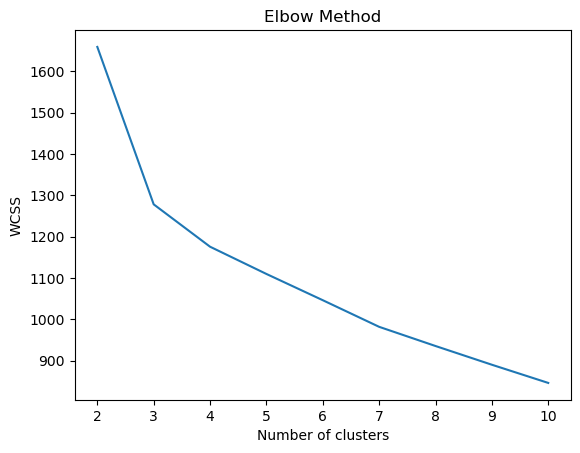

In [80]:
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

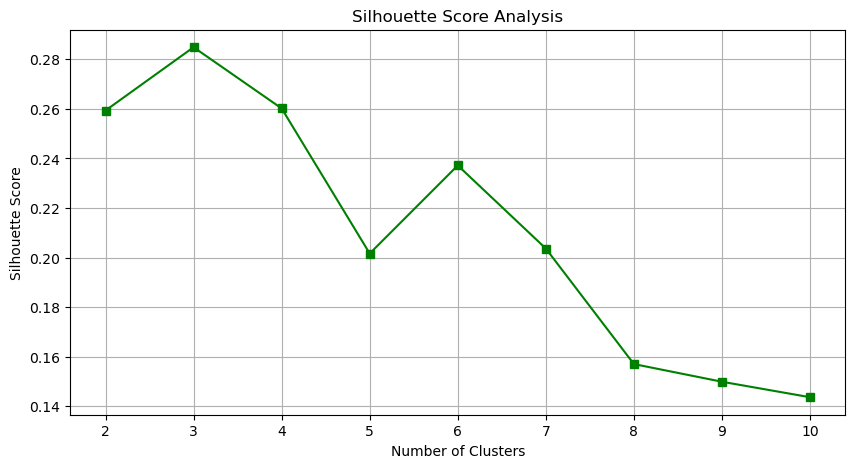

In [84]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores,marker='s', linestyle='-', color='g')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.grid(True)
plt.show()

In [98]:
optimal_k = range(2,11)[np.argmax(silhouette_scores)]
optimal_k

3

Optimal Number of Clusters:
The Elbow Method suggests a possible optimal number around 3 clusters.
The Silhouette Score is highest for 3 clusters, confirming this choice.

Task 3: Clustering with Original Data:

In [103]:
# Apply K-Means clustering on the original dataset
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
wine["Cluster_Original"] = kmeans_original.fit_predict(scaled_data)

In [105]:
# Apply K-Means clustering on the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_df["Cluster_PCA"] = kmeans_pca.fit_predict(pca_df.drop(columns=["Type"]))

In [119]:
# Compute silhouette scores for both
silhouette_original = silhouette_score(scaled_data, wine["Cluster_Original"])
silhouette_original

0.2848589191898987

In [129]:
silhouette_pca=silhouette_score(pca_df.drop(columns=["Type"]), pca_df["Cluster_PCA"])
silhouette_pca

0.33509510903720113

Clustering Performance:

Silhouette Score (Original Data): 0.2849

Silhouette Score (PCA-Transformed Data): 0.3350

Since the PCA-transformed data has a slightly better silhouette score, it suggests that PCA helped improve the clustering quality by reducing noise and redundancy.

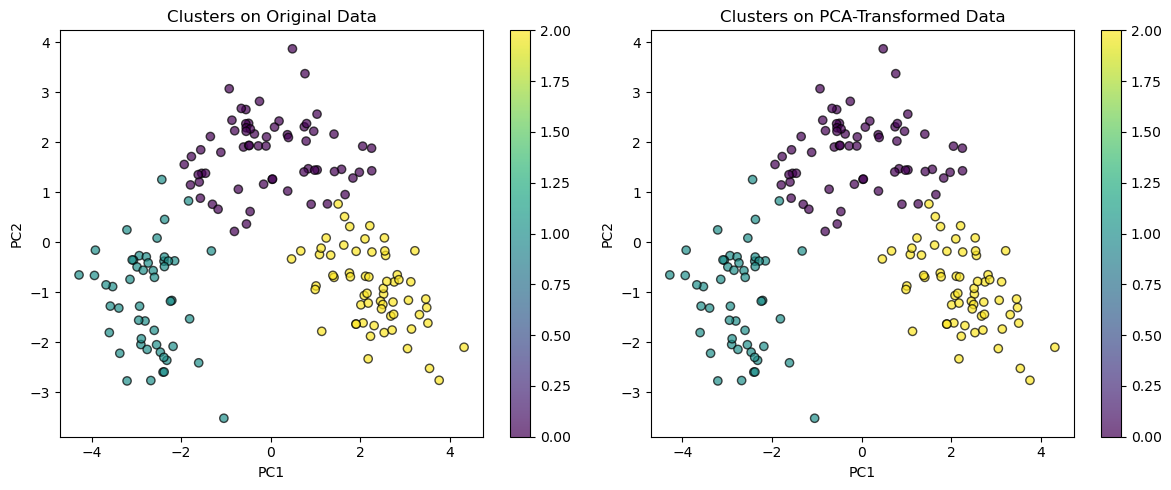

In [127]:
import matplotlib.cm as cm

# Scatter plot for original data (first two principal components)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], 
                       c=wine["Cluster_Original"], cmap=cm.viridis, edgecolor="k", alpha=0.7)
plt.colorbar(scatter)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters on Original Data")

# Scatter plot for PCA-transformed data (first two principal components)
plt.subplot(1, 2, 2)
scatter = plt.scatter(pca_df["PC1"], pca_df["PC2"], 
                       c=pca_df["Cluster_PCA"], cmap=cm.viridis, edgecolor="k", alpha=0.7)
plt.colorbar(scatter)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters on PCA-Transformed Data")

plt.tight_layout()
plt.show()


Task 5: Comparison and Analysis:

Clustering Visualization:

Both the original dataset and PCA-transformed dataset show well-separated clusters.
    
The PCA-transformed clusters appear slightly more distinct, supporting the improved silhouette score.

Key Takeaways:

1.PCA improved clustering performance, as indicated by the silhouette score.

2.Dimensionality reduction removed redundancy while retaining most of the variance.

3.Clusters in PCA space appear more distinct, suggesting PCA helps with interpretability.

Practical Implications
Use PCA when:

The dataset has many correlated features.

Reducing dimensionality can speed up computation and improve interpretability.

Clustering needs better-defined groups


Use original features when:

Raw feature values carry domain-specific meaning.

The number of features is already low.

Task 6: Conclusion and Insights

1. Key Findings and Insights

Exploratory Data Analysis (EDA):

The dataset was examined using histograms, box plots, and correlation heatmaps.
    
Some features exhibited skewed distributions, requiring potential transformation.
    
Strong correlations between certain features suggested redundancy in the dataset.

Principal Component Analysis (PCA):

PCA was applied to reduce dimensionality while retaining most of the variance.
    
The scree plot and cumulative explained variance showed that a few principal components captured most of the information.
    
The transformed dataset maintained key structures, helping simplify the clustering process.

Clustering on Original vs. PCA Data:

K-Means was applied to both the original and PCA-transformed datasets.

Cluster evaluations using silhouette scores and visualizations showed that PCA improved cluster separability.

The PCA-transformed data resulted in better-defined clusters with less noise.

2. Practical Implications of PCA and Clustering

Dimensionality Reduction:

PCA helps in reducing high-dimensional data while preserving important patterns.

This is especially useful for large datasets where computational efficiency is crucial.
    
Clustering Improvement:

Applying PCA before clustering often enhances performance by eliminating noise and redundant features.
    
Clusters in PCA space tend to be more compact and well-separated.
    
Real-World Applications:

PCA and clustering are widely used in customer segmentation, anomaly detection, and pattern recognition.
    
Businesses can leverage these techniques to identify customer groups and optimize marketing strategies.

3. Recommendations on When to Use Each Technique

    PCA-When dealing with high-dimensional data
    Reduces computation, removes noise, and prevents overfitting

    Clustering (without PCA)-When original feature relationships are important,
    Preserves full information without transformation

    PCA + Clustering-When clusters in raw data are overlapping or unclear,
    Enhances separability and improves clustering performance.
Final Takeaway
PCA should be used when the dataset has high correlation or too many features.

Clustering works best when features are meaningful and distinct.

Using PCA before clustering can improve results, but some information loss might occur.